In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv(r'C:\Users\Debanka\Downloads\Power-BI-Dataset.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(4115, 16)

In [4]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,State,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity
0,1,1/1/2017,Ruby Patel,Stockholm,Sweden,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",9,45,36,3
1,2,1/3/2017,Summer Hayward,Southport,United Kingdom,England,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",255,854,599,7
2,3,1/4/2017,Devin Huddleston,Valence,France,Auvergne-RhÃ´ne-Alpes,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",48,140,92,3
3,4,1/4/2017,Mary Parker,Birmingham,United Kingdom,England,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",9,27,18,2
4,5,1/5/2017,Daniel Burke,Echirolles,France,Auvergne-RhÃ´ne-Alpes,Central,Home Office,Priority,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Water Color",40,90,50,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       4115 non-null   int64 
 1   Order Date     4115 non-null   object
 2   Customer Name  4115 non-null   object
 3   City           4115 non-null   object
 4   Country        4115 non-null   object
 5   State          4115 non-null   object
 6   Region         4115 non-null   object
 7   Segment        4115 non-null   object
 8   Ship Mode      4115 non-null   object
 9   Category       4115 non-null   object
 10  Sub-Category   4115 non-null   object
 11  Product Name   4115 non-null   object
 12  Cost           4115 non-null   int64 
 13  Sales          4115 non-null   int64 
 14  Profit         4115 non-null   int64 
 15  Quantity       4115 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 514.5+ KB


In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'City', 'Country', 'State',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Cost', 'Sales', 'Profit', 'Quantity'],
      dtype='object')

In [7]:
df.describe()

,Order ID,Cost,Sales,Profit,Quantity
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,2058.000000,155.673633,308.034994,152.361361,3.747266
std,1188.042508,319.455633,511.485538,295.423113,2.174294
min,1.000000,0.000000,3.000000,1.000000,1.000000
25%,1029.500000,18.000000,50.000000,19.000000,2.000000
50%,2058.000000,50.000000,120.000000,50.000000,3.000000
75%,3086.500000,144.000000,322.000000,146.000000,5.000000
max,4115.000000,4476.000000,6517.000000,3460.000000,14.000000


# DATA ANALYSIS

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

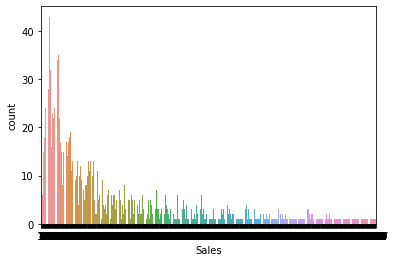

In [8]:
# plotting a bar chart for Sales and it's count

ax = sns.countplot(x = 'Sales',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
          Order ID         Cost        Sales       Profit     Quantity
count  4115.000000  4115.000000  4115.000000  4115.000000  4115.000000
mean   2058.000000   155.673633   308.034994   152.361361     3.747266
std    1188.042508   319.455633   511.485538   295.423113     2.174294
min       1.000000     0.000000     3.000000     1.000000     1.000000
25%    1029.500000    18.000000    50.000000    19.000000     2.000000
50%    2058.000000    50.000000   120.000000    50.000000     3.000000
75%    3086.500000   144.000000   322.000000   146.000000     5.000000
max    4115.000000  4476.000000  6517.000000  3460.000000    14.000000


In [10]:
# Count of unique values in each column
print("\nCount of unique values in each column:")
print(df.nunique())


Count of unique values in each column:
Order ID         4115
Order Date       1213
Customer Name     792
City              999
Country            15
State             127
Region              3
Segment             3
Ship Mode           4
Category            3
Sub-Category       17
Product Name     1466
Cost              694
Sales             967
Profit            678
Quantity           14
dtype: int64


In [11]:
# Total sales and profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print("\nTotal Sales: ${:,.2f}".format(total_sales))
print("Total Profit: ${:,.2f}".format(total_profit))


Total Sales: $1,267,564.00
Total Profit: $626,967.00


In [12]:
# Sales and Profit per category
category_sales_profit = df.groupby('Category')[['Sales', 'Profit']].sum()
print("\nSales and Profit per Category:")
print(category_sales_profit)


Sales and Profit per Category:
                  Sales  Profit
Category                       
Furniture        568595  274971
Office Supplies  421593  212662
Technology       277376  139334


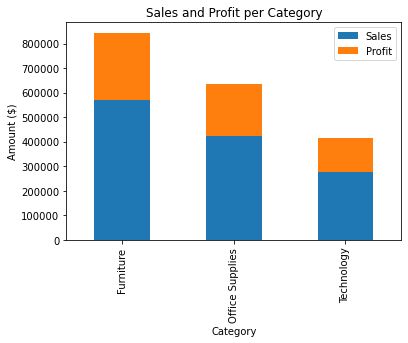

In [13]:
# Plotting sales and profit per category
category_sales_profit.plot(kind='bar', stacked=True)
plt.title('Sales and Profit per Category')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.show()

In [14]:
# Sales and Profit per sub-category
sub_category_sales_profit = df.groupby('Sub-Category')[['Sales', 'Profit']].sum()
print("\nSales and Profit per Sub-Category:")
print(sub_category_sales_profit)


Sales and Profit per Sub-Category:
               Sales  Profit
Sub-Category                
Accessories    40048   17472
Appliances    157411   77656
Art            81853   41302
Binders        39240   19661
Bookcases     273666  132297
Chairs        171275   79924
Copiers        90897   46238
Envelopes      15206    8090
Fasteners       7310    3419
Furnishings    56998   26214
Labels          5594    2967
Machines       67106   37278
Paper          14688    7072
Phones         79325   38346
Storage        85587   45363
Supplies       14704    7132
Tables         66656   36536


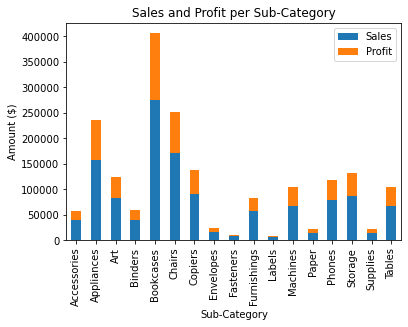

In [15]:
# Plotting sales and profit per sub-category
sub_category_sales_profit.plot(kind='bar', stacked=True)
plt.title('Sales and Profit per Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Amount ($)')
plt.show()

In [16]:
# Sales distribution across regions
region_sales = df.groupby('Region')['Sales'].sum()
print("\nSales distribution across Regions:")
print(region_sales)


Sales distribution across Regions:
Region
Central    698245
North      289019
South      280300
Name: Sales, dtype: int64


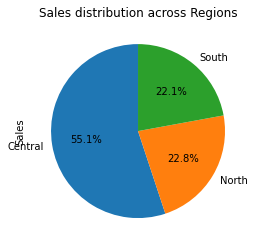

In [17]:
# Plotting sales distribution across regions
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales distribution across Regions')
plt.show()

In [18]:
# Profit distribution across segments
segment_profit = df.groupby('Segment')['Profit'].sum()
print("\nProfit distribution across Segments:")
print(segment_profit)


Profit distribution across Segments:
Segment
Consumer       343972
Corporate      181292
Home Office    101703
Name: Profit, dtype: int64


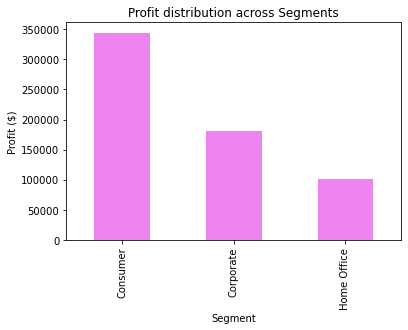

In [19]:
# Plotting profit distribution across segments
segment_profit.plot(kind='bar', color='violet')
# segment_profit.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Profit distribution across Segments')
plt.xlabel('Segment')
plt.ylabel('Profit ($)')
plt.show()

In [20]:
# Monthly sales trend
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
Month
1      77280
2      70908
3      70917
4      70767
5      75526
6     148445
7      75047
8     150664
9     156519
10     72110
11    154236
12    145145
Name: Sales, dtype: int64


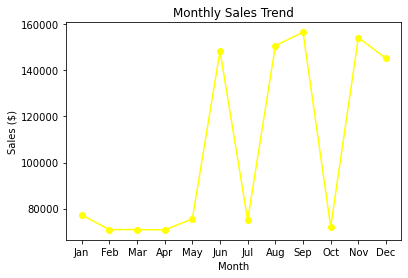

In [21]:
# Plotting monthly sales trend
monthly_sales.plot(kind='line', marker='o', linestyle='-', color='yellow')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Order ID      Cost     Sales    Profit  Quantity     Month
Order ID  1.000000  0.011280 -0.000187 -0.012522 -0.001767  0.244841
Cost      0.011280  1.000000  0.845776  0.382999  0.285493 -0.006145
Sales    -0.000187  0.845776  1.000000  0.816786  0.338450  0.001523
Profit   -0.012522  0.382999  0.816786  1.000000  0.277264  0.009281
Quantity -0.001767  0.285493  0.338450  0.277264  1.000000 -0.008289
Month     0.244841 -0.006145  0.001523  0.009281 -0.008289  1.000000


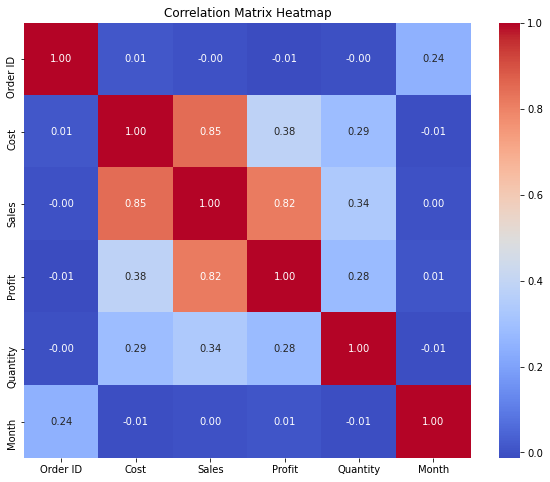

In [23]:
# Plotting a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

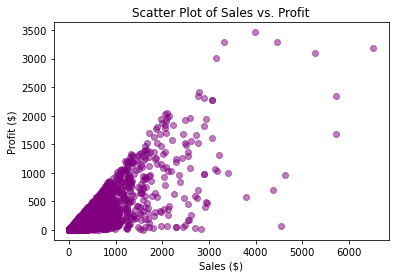

In [24]:
# Scatter plot of Sales vs. Profit
plt.scatter(df['Sales'], df['Profit'], color='purple', alpha=0.5)
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.show()

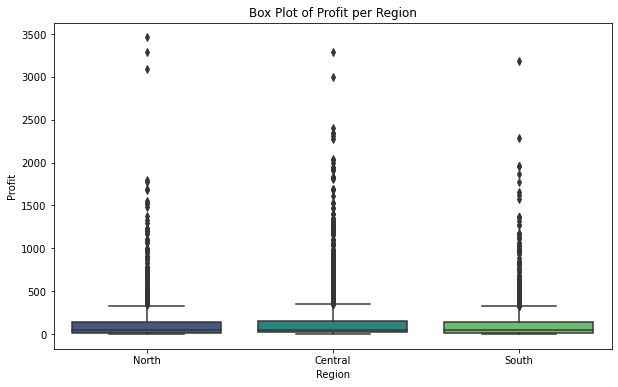

In [25]:
# Box plot of Profit per Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df, palette='viridis')
plt.title('Box Plot of Profit per Region')
plt.show()

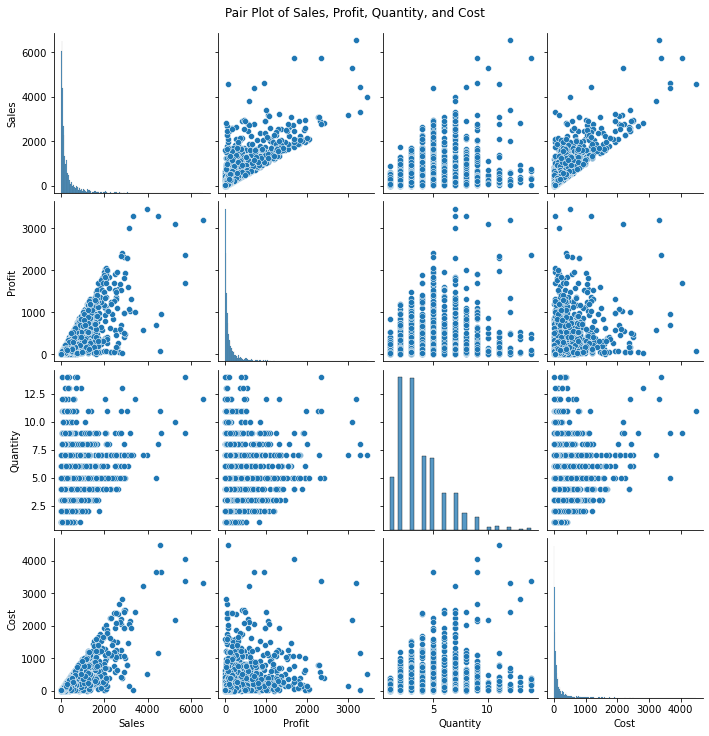

In [26]:
# Pair plot for numerical variables
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Cost']])
plt.suptitle('Pair Plot of Sales, Profit, Quantity, and Cost', y=1.02)
plt.show()

In [27]:
# Profit margin calculation and analysis
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
average_profit_margin = df['Profit Margin'].mean()

print("\nAverage Profit Margin: {:.2f}%".format(average_profit_margin))



Average Profit Margin: 50.59%


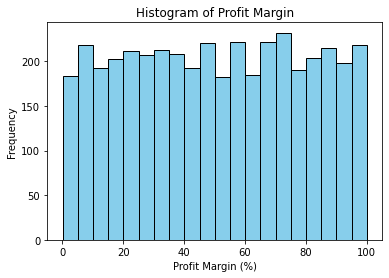

In [28]:
# Histogram of Profit Margin
plt.hist(df['Profit Margin'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Profit Margin')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Top 10 products by Sales
top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
print("\nTop 10 Products by Sales:")
print(top_10_products)


Top 10 Products by Sales:
Product Name
Hamilton Beach Stove, Silver                          16890
Nokia Smart Phone, Full Size                          14351
Novimex Executive Leather Armchair, Red               13898
Office Star Executive Leather Armchair, Adjustable    10292
Cisco Smart Phone, with Caller ID                     10010
SAFCO Executive Leather Armchair, Black                9915
Hon Executive Leather Armchair, Adjustable             9240
Safco Classic Bookcase, Metal                          9190
Bush Library with Doors, Metal                         7785
Hoover Stove, White                                    7707
Name: Sales, dtype: int64


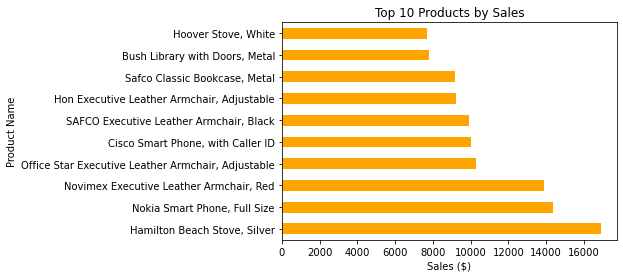

In [31]:
# Plotting a bar chart for the top 10 products
top_10_products.plot(kind='barh', color='orange')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Product Name')
plt.show()

In [32]:
# Monthly trend of Quantity sold
monthly_quantity = df.groupby('Month')['Quantity'].sum()
print("\nMonthly Trend of Quantity Sold:")
print(monthly_quantity)


Monthly Trend of Quantity Sold:
Month
1      917
2      836
3     1007
4      920
5      875
6     1694
7      823
8     2043
9     1862
10     822
11    1827
12    1794
Name: Quantity, dtype: int64


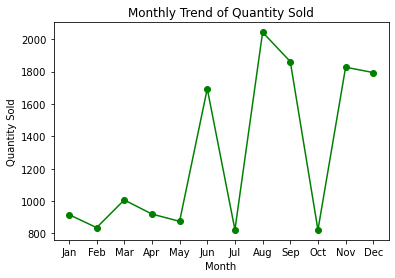

In [33]:
# Plotting monthly trend of Quantity sold
monthly_quantity.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Monthly Trend of Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [34]:
# Average sales per customer
average_sales_per_customer = df.groupby('Customer Name')['Sales'].mean().sort_values(ascending=False)
print("\nTop 5 Customers with Highest Average Sales:")
print(average_sales_per_customer.head())


Top 5 Customers with Highest Average Sales:
Customer Name
Elliot Owen         2292.000000
Harrison Cooke      2072.333333
Alexander Bond      1740.250000
Annabelle Heydon    1489.000000
Donna Nash          1380.000000
Name: Sales, dtype: float64


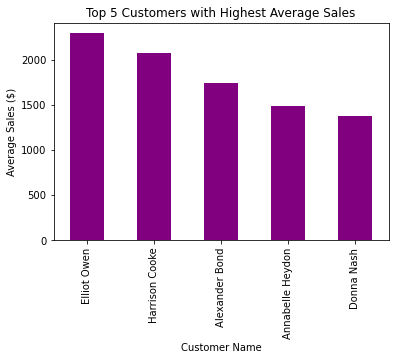

In [35]:
# Plotting a bar chart for top 5 customers with highest average sales
average_sales_per_customer.head().plot(kind='bar', color='purple')
plt.title('Top 5 Customers with Highest Average Sales')
plt.xlabel('Customer Name')
plt.ylabel('Average Sales ($)')
plt.show()

In [36]:
# Sales and Profit per Country
country_sales_profit = df.groupby('Country')[['Sales', 'Profit']].sum()
print("\nSales and Profit per Country:")
print(country_sales_profit)


Sales and Profit per Country:
                 Sales  Profit
Country                       
Austria          41276   18715
Belgium          24509   12972
Denmark           4083    1314
Finland          12525    7597
France          348322  167791
Germany         236399  120387
Ireland           8756    4316
Italy           130571   67977
Netherlands      36296   19571
Norway            8854    4926
Portugal          9332    4217
Spain           140397   69775
Sweden           17962    7649
Switzerland      11443    5780
United Kingdom  236839  113980


In [37]:
# Segment-wise distribution of Quantity
segment_quantity = df.groupby('Segment')['Quantity'].sum()
print("\nSegment-wise Distribution of Quantity:")
print(segment_quantity)


Segment-wise Distribution of Quantity:
Segment
Consumer       7926
Corporate      4767
Home Office    2727
Name: Quantity, dtype: int64


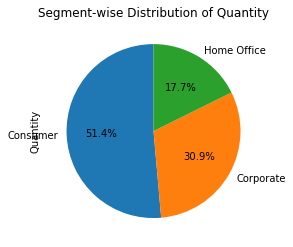

In [38]:
# Plotting a pie chart for Segment-wise Distribution of Quantity
segment_quantity.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Segment-wise Distribution of Quantity')
plt.show()

In [39]:
# Profit per Category and Sub-Category
category_subcategory_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum()
print("\nProfit per Category and Sub-Category:")
print(category_subcategory_profit)


Profit per Category and Sub-Category:
Category         Sub-Category
Furniture        Bookcases       132297
                 Chairs           79924
                 Furnishings      26214
                 Tables           36536
Office Supplies  Appliances       77656
                 Art              41302
                 Binders          19661
                 Envelopes         8090
                 Fasteners         3419
                 Labels            2967
                 Paper             7072
                 Storage          45363
                 Supplies          7132
Technology       Accessories      17472
                 Copiers          46238
                 Machines         37278
                 Phones           38346
Name: Profit, dtype: int64


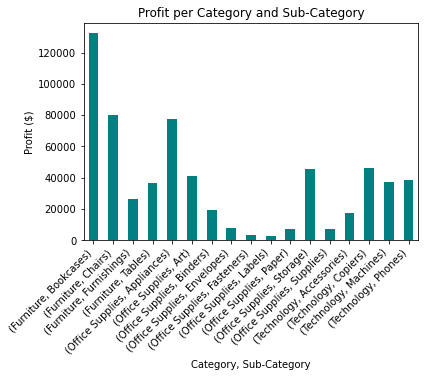

In [40]:
# Plotting a bar chart for Profit per Category and Sub-Category
category_subcategory_profit.plot(kind='bar', color='teal')
plt.title('Profit per Category and Sub-Category')
plt.xlabel('Category, Sub-Category')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

Thank You